In [0]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
tf.enable_eager_execution()

TensorFlow 2.x selected.


In [0]:
bankdata = pd.read_csv('/content/bank.csv')

In [0]:
bankdata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
bankdata.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [0]:

bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [0]:
#check if there are any missing values in the data
bankdata.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [0]:
# there are no missing values

In [0]:
#Droping the columns which are unique for all users like IDs

In [0]:
bankdata.drop(["RowNumber","CustomerId","Surname"], axis = 1, inplace=True)

In [0]:
#Distinguishing the feature and target set

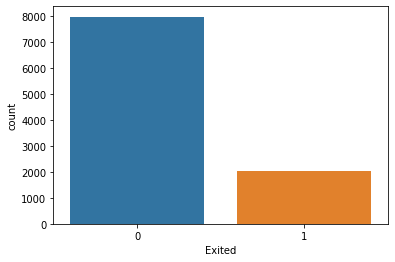

In [0]:
sns.countplot(x = "Exited", data = bankdata)

In [0]:
#here we clearly see the distribution of 0 and 1 in the data for the target column "Exited"

In [0]:
#count information
bankdata["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d7e75ada0>,
      dtype=object)

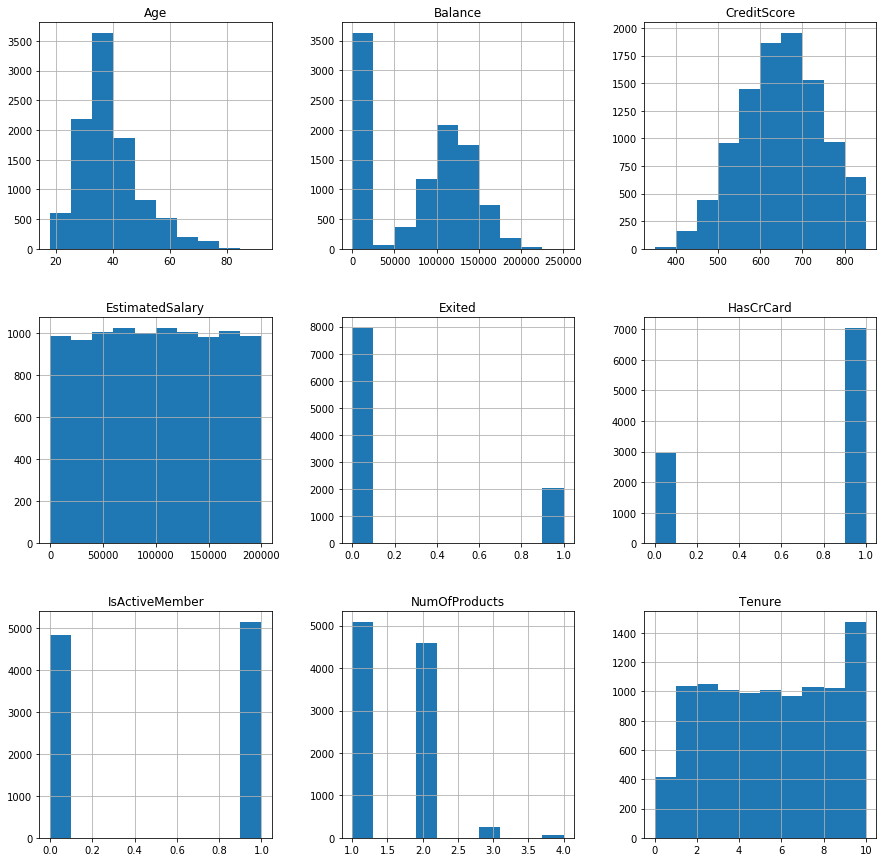

In [0]:
bankdata.hist(figsize=(15,15))

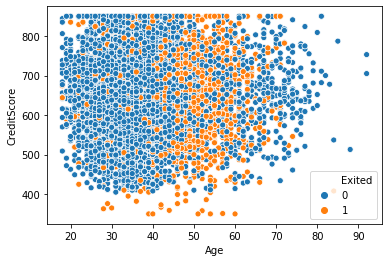

In [0]:
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=bankdata)

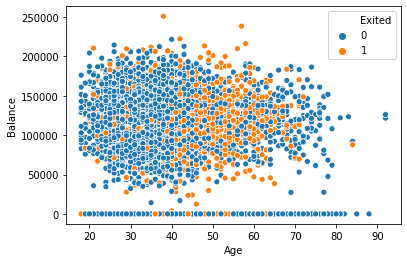

In [0]:
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=bankdata)

In [0]:
#Label Encoding columns "Geography" and "Gender"
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
bankdata['Geography'] = labelencoder.fit_transform(bankdata["Geography"])
bankdata['Gender'] = labelencoder.fit_transform(bankdata["Gender"])

In [0]:
bankdata.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8674,529,0,1,67,8,103101.56,2,1,1,154002.02,1


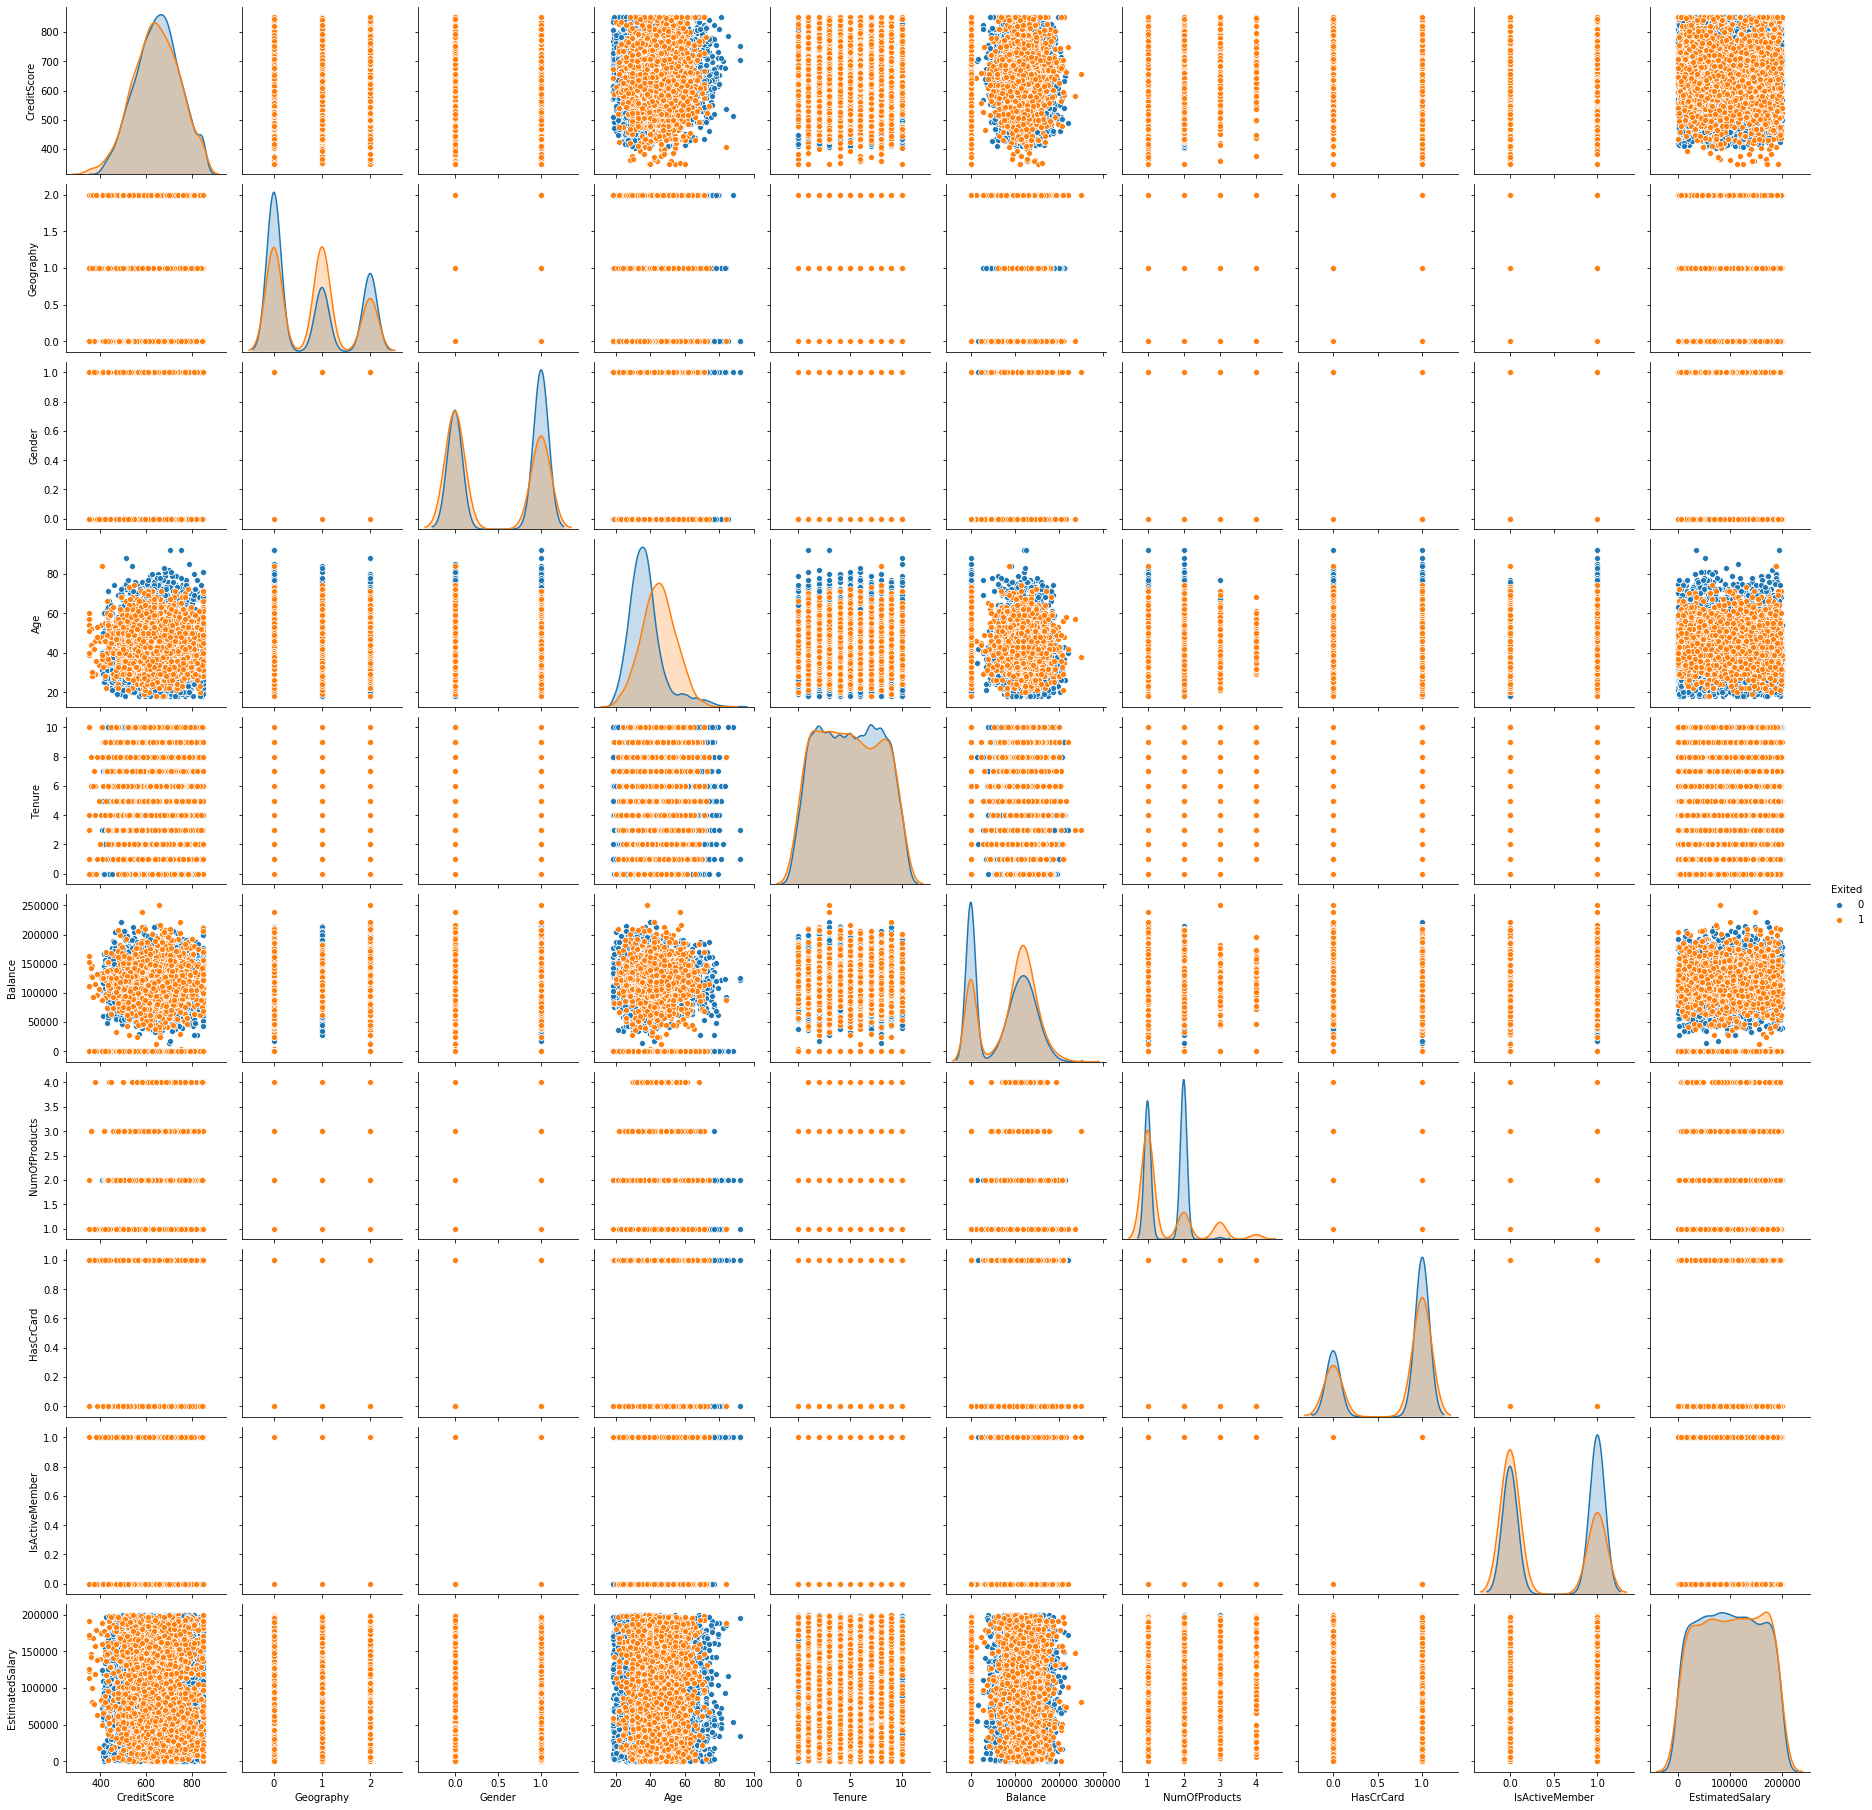

In [0]:
sns.pairplot(bankdata, diag_kind= 'kde', hue='Exited')

In [0]:
#In Age column,we see a decent separating between 0 and 1 in "Exited"
#In Age and EstimatedSalary column we see a cluster with people Exited age between approx 22 to 65

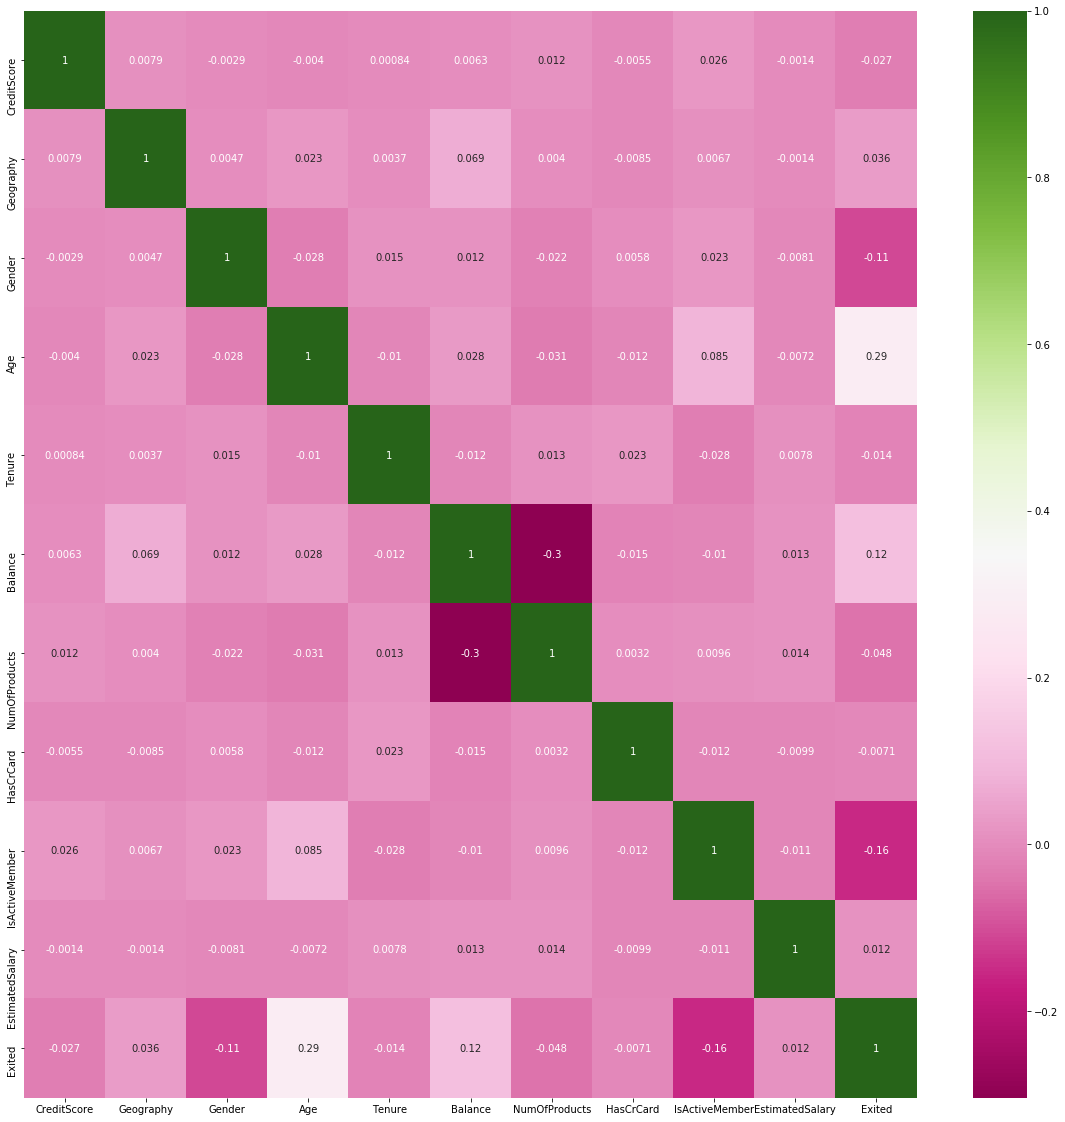

In [0]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(bankdata.corr(),annot=True,cbar=True, cmap="PiYG", ax=ax)

In [0]:
#Dividing the data set into training and test sets
# Independent variable 
X = bankdata.drop(["Exited"], axis=1)
# Target variable
y = bankdata["Exited"]

In [0]:
#splitting 70:30 training and test set
test_size = 0.30 
seed = 1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [0]:
from sklearn.preprocessing import StandardScaler


In [0]:
normalize = StandardScaler()
X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)

In [0]:
#Initializing and building model

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
#Add Dense Layer to create a hidden layer of 6 neurons with Relu activation
model.add(tf.keras.layers.Dense(6,  activation='relu', input_shape=(10,)))
#Add Dense Layer to create a hidden layer of 6 neurons with Relu activation
model.add(tf.keras.layers.Dense(6,  activation='relu'))
#lets' add Dense Layer which provides 1 Outputs with sigmoid activation.
model.add( tf.keras.layers.Dense(1,activation='sigmoid', name='output'))
#Compile the model with binary_crossentropy loss and sgd optimizer
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# set early stopping with patience=5  
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model with no.of epochs=500
model.fit(X_train,y_train,      
          validation_data=(X_test,y_test),
          epochs=500,
          callbacks=[callback])

Train on 7000 samples, validate on 3000 samples
Epoch 1/500
7000/7000 [==============================] - 1s 153us/sample - loss: 0.6399 - accuracy: 0.6894 - val_loss: 0.5670 - val_accuracy: 0.7923
Epoch 2/500
7000/7000 [==============================] - 0s 62us/sample - loss: 0.5396 - accuracy: 0.7984 - val_loss: 0.5271 - val_accuracy: 0.7910
Epoch 3/500
7000/7000 [==============================] - 0s 64us/sample - loss: 0.5145 - accuracy: 0.7986 - val_loss: 0.5138 - val_accuracy: 0.7910
Epoch 4/500
7000/7000 [==============================] - 0s 60us/sample - loss: 0.5037 - accuracy: 0.7986 - val_loss: 0.5067 - val_accuracy: 0.7910
Epoch 5/500
7000/7000 [==============================] - 0s 62us/sample - loss: 0.4967 - accuracy: 0.7989 - val_loss: 0.5014 - val_accuracy: 0.7917
Epoch 6/500
7000/7000 [==============================] - 0s 62us/sample - loss: 0.4913 - accuracy: 0.7996 - val_loss: 0.4971 - val_accuracy: 0.7953
Epoch 7/500
7000/7000 [==============================] - 0s 61u

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
output (Dense)               (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Predicting the results using 0.5 as a threshold

In [0]:
y_model_pred = model.predict(X_test)
y_pred = (y_model_pred > 0.5) 

In [0]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [0]:
#Printing the Accuracy score and Confusion Matrix

In [0]:
confusion_matrix(y_test, y_pred)

array([[2304,   69],
       [ 363,  264]])

In [0]:
score = model.evaluate(X_train, y_train)
print('\n', 'Training accuracy is', score[1]*100)

7000/7000 [==============================] - 0s 35us/sample - loss: 0.3511 - accuracy: 0.8564

 Training accuracy is 85.64285635948181


In [0]:
score = model.evaluate(X_test, y_test)
print('\n', 'Testing accuracy is', score[1]*100)

3000/3000 [==============================] - 0s 31us/sample - loss: 0.3547 - accuracy: 0.8560

 Testing accuracy is 85.6000006198883


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2373
           1       0.79      0.42      0.55       627

    accuracy                           0.86      3000
   macro avg       0.83      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000



In [0]:
#In neural network we get train accuracy 85.64% & test accuracy 85.60%
# Here we see that the recall score is 42%